In [24]:
# Install prophet & yfinance
!pip install prophet
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
# Import Libraries
import pandas as pd
import plotly.express as px
from prophet import Prophet
import datetime as datetime
import yfinance as yf
from google.colab import files

In [26]:
# Initlialize Plotly
import plotly.io as pio
pio.renderers.default="colab"

In [27]:
#read time series data from Yahoo Finance by yfinance
#TSLA = yf.Ticker("TSLA") 
#start = datetime.datetime(2021,11,8)
#end = datetime.datetime(2022,11,6)
#df = TSLA.history(start=start, end=end, auto_adjust=True)

# print count of rows and columns
#print(df.shape)

# Displays top 5 rows
#df.head()

In [28]:
#if import data via url: 
url="https://query1.finance.yahoo.com/v7/finance/download/TSLA?period1=1636172912&period2=1667708912&interval=1d&events=history&includeAdjustedClose=true"
df=pd.read_csv(url)  
print(df.shape) 
df.head()

(251, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-08,383.263336,399.000000,377.666656,387.646667,387.646667,100337100
1,2021-11-09,391.200012,391.500000,337.173340,341.166656,341.166656,177317400
2,2021-11-10,336.803345,359.366669,329.103333,355.983337,355.983337,128408100
3,2021-11-11,367.589996,368.323334,351.559998,354.503326,354.503326,67189800
4,2021-11-12,349.166656,351.500000,339.733337,344.473328,344.473328,76719300


In [29]:
# check for null values, data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [30]:
# Statistical Analysis
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,291.675710,298.819509,283.246640,290.734648,290.734648,8.051166e+07
std,48.724076,49.110021,47.154250,48.010147,48.010147,2.203784e+07
min,205.820007,213.500000,198.589996,204.990005,204.990005,3.504270e+07
25%,248.646667,254.903328,240.593331,245.618332,245.618332,6.486120e+07
50%,292.923340,300.000000,285.033325,291.093323,291.093323,7.855740e+07
75%,331.961670,338.430008,324.675003,331.604995,331.604995,9.355365e+07
max,396.516663,402.666656,378.679993,399.926666,399.926666,1.773174e+08


In [31]:
# Visualize historical performance
px.area(df,x='Date', y='Close', title="Close Price History")

In [32]:
px.line(df,x='Date', y='Close', title="Close Price History")

In [33]:
px.area(df,x='Date', y='Volume', title="Volume History")

In [34]:
px.bar(df, y='Volume',title="Volume History")

In [35]:
px.box(df, y='Close', title="Close Price Box Plot")

In [36]:
# Data preparation for prophet
columns=['Date','Close']
ndf=pd.DataFrame(df, columns=columns)
print(ndf.shape)
ndf.head()

(251, 2)


,Date,Close
0,2021-11-08,387.646667
1,2021-11-09,341.166656
2,2021-11-10,355.983337
3,2021-11-11,354.503326
4,2021-11-12,344.473328


In [37]:
# Renaming as per prophet
prophet_df=ndf.rename(columns={'Date':'ds','Close':'y'})
prophet_df.head()

,ds,y
0,2021-11-08,387.646667
1,2021-11-09,341.166656
2,2021-11-10,355.983337
3,2021-11-11,354.503326
4,2021-11-12,344.473328


In [38]:
# Prophet Model
m=Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqkhtg5td/q_7u9cm1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqkhtg5td/rhhr25iq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69523', 'data', 'file=/tmp/tmpqkhtg5td/q_7u9cm1.json', 'init=/tmp/tmpqkhtg5td/rhhr25iq.json', 'output', 'file=/tmp/tmpqkhtg5td/prophet_model97_hf3lr/prophet_model-20221106170621.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:06:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:06:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [39]:
# Forecast of TSLA price over 30 days
future=m.make_future_dataframe(periods=30)
forecast=m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-11-08,364.226412,321.274027,403.130703,364.226412,364.226412,-1.651550,-1.651550,-1.651550,-1.651550,-1.651550,-1.651550,0.0,0.0,0.0,362.574862
1,2021-11-09,363.791128,320.129523,401.394748,363.791128,363.791128,-4.123814,-4.123814,-4.123814,-4.123814,-4.123814,-4.123814,0.0,0.0,0.0,359.667314
2,2021-11-10,363.355844,319.081069,400.494685,363.355844,363.355844,-2.949424,-2.949424,-2.949424,-2.949424,-2.949424,-2.949424,0.0,0.0,0.0,360.406420
3,2021-11-11,362.920560,316.995411,401.930001,362.920560,362.920560,-5.917435,-5.917435,-5.917435,-5.917435,-5.917435,-5.917435,0.0,0.0,0.0,357.003125
4,2021-11-12,362.485276,313.702859,396.369319,362.485276,362.485276,-8.501342,-8.501342,-8.501342,-8.501342,-8.501342,-8.501342,0.0,0.0,0.0,353.983934


In [40]:
px.line(forecast, x='ds', y='yhat',title="30 days forecast")

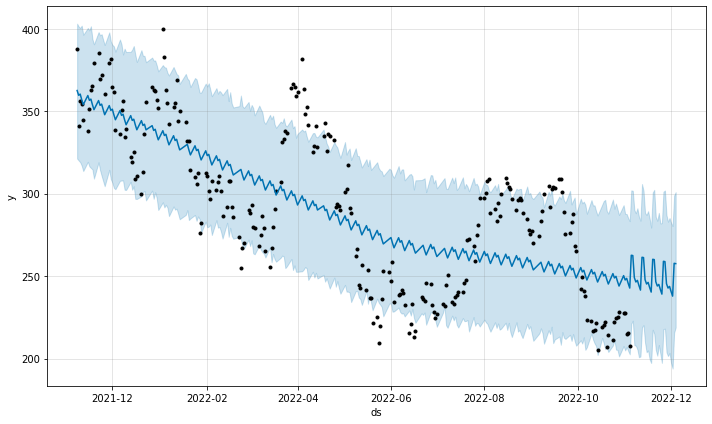

In [41]:
figure1=m.plot(forecast,xlabel='ds',ylabel='y')

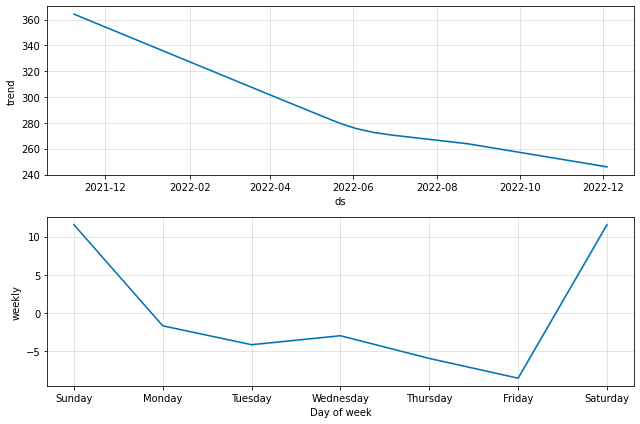

In [42]:
figure2=m.plot_components(forecast)

In [43]:
# Download forecast data
forecast.to_csv('forecast.csv')
files.download("forecast.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>